## Preparing data for fitting

Will place data into the model formula for both formulae given by Samraat.

# Import Packages

In [1]:
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Import Data

In [2]:
data = pd.read_csv("../data/CRat.csv")
subset = data[data["ID"] == 39982]
ResDens = sc.array(subset["ResDensity"])
NTrait = sc.array(subset["N_TraitValue"])
type(ResDens)
type(NTrait)

numpy.ndarray

# Define Functions

## Function 1
Then, there is the more mechanistic Holling Type II model (Holling, 1959):

### **c=axR / 1+haxR**

Here, xR
is resource density (Mass / Area or Volume), a is consumer's search rate (Area or Volume / Time ), and h is handling time of the consumer for that resource (time taken to overpower and ingest it).


In data:

a = free variable?

Xr = ResDensity

h = free variable?

In [3]:
def calc_C(Xr, a, h):
    top = a*Xr
    bot = 1 + (h*a*Xr)
    C = top/bot
    return C 

In [4]:
#C = calc_C(a, xdata, h)

VVVThis generates the coeficient of the modelVVV

In [5]:
popt, pcov = curve_fit(f = calc_C, xdata = ResDens, ydata = NTrait , p0 = [.1, .1], method = 'lm')
popt

array([  1.86343017e-04,   3.55860752e+01])

Generate a series of Resource denities to use when generating model line.
Also sort it so the line is smooth and doesn't jump around.

In [6]:
RDensities = sc.random.uniform(min(NTrait), max(NTrait), 200)
RDensities.sort()

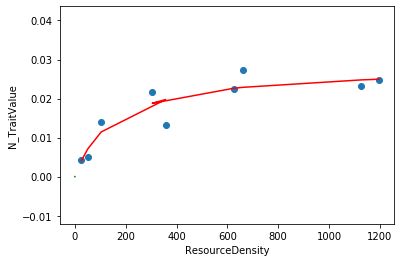

In [9]:
plt.scatter(ResDens, NTrait)
plt.plot(ResDens, calc_C(ResDens, *popt), '-r')
plt.plot(RDensities, calc_C(RDensities, *popt), '-g')
plt.xlabel('ResourceDensity')
plt.ylabel('N_TraitValue')

## Function 2
There is also the less-mechanistic "generalized" functional response model:

c=axR^q+1 /

   1+haxR^q+1

In [28]:
def calc_CQ(Xr, a, h):
    q=0.05
    top = a*Xr^(q+1)
    bot = 1 + (h*a*Xr^(q+1))
    C = top/bot
    return C 

### Define q

In [14]:
q = 0.05 ## arbitrarily difined right now as 0.05

In [29]:
popt, pcov = curve_fit(f = calc_CQ, xdata = ResDens, ydata = NTrait, p0 = [.1, .1], method = 'lm')
popt

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
RDensities = sc.random.uniform(min(NTrait), max(NTrait), 200)
RDensities.sort()

### example on using optimize.curve_fit from: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit


In [ ]:
# 
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Define the data to be fit with some noise:


xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

# Fit for the parameters a, b, c of the function func:


popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:


popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))



plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



for starting values can look at the plots 

can also try to run the freeplot 1000x and use values generated by that